# xgboost

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/Users/ela/jdsz4-dept2/projekt_ml/dataset/insurance_hot_version.csv')

In [3]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
charges             1338 non-null float64
sex_female          1338 non-null int64
sex_male            1338 non-null int64
smoker_no           1338 non-null int64
smoker_yes          1338 non-null int64
region_northeast    1338 non-null int64
region_northwest    1338 non-null int64
region_southeast    1338 non-null int64
region_southwest    1338 non-null int64
dtypes: float64(2), int64(10)
memory usage: 125.6 KB


In [5]:
df.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().values.any()

False

In [7]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [8]:
X = df.drop(columns=['charges'])
y = df[['charges']].values.ravel()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)
norm_X_train = scaler.transform(X_train)
norm_X_test = scaler.transform(X_test)

### xgboost

In [11]:
xgb_reg = xgb.XGBRegressor()

In [12]:
xgb_reg.fit(norm_X_train, y_train)

[13:10:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [13]:
y_pred = xgb_reg.predict(norm_X_test)

In [14]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

RMSE:  4524.24975993119


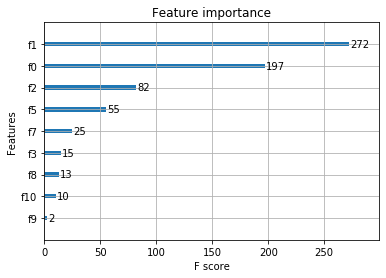

In [16]:
xgb.plot_importance(xgb_reg)

In [17]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

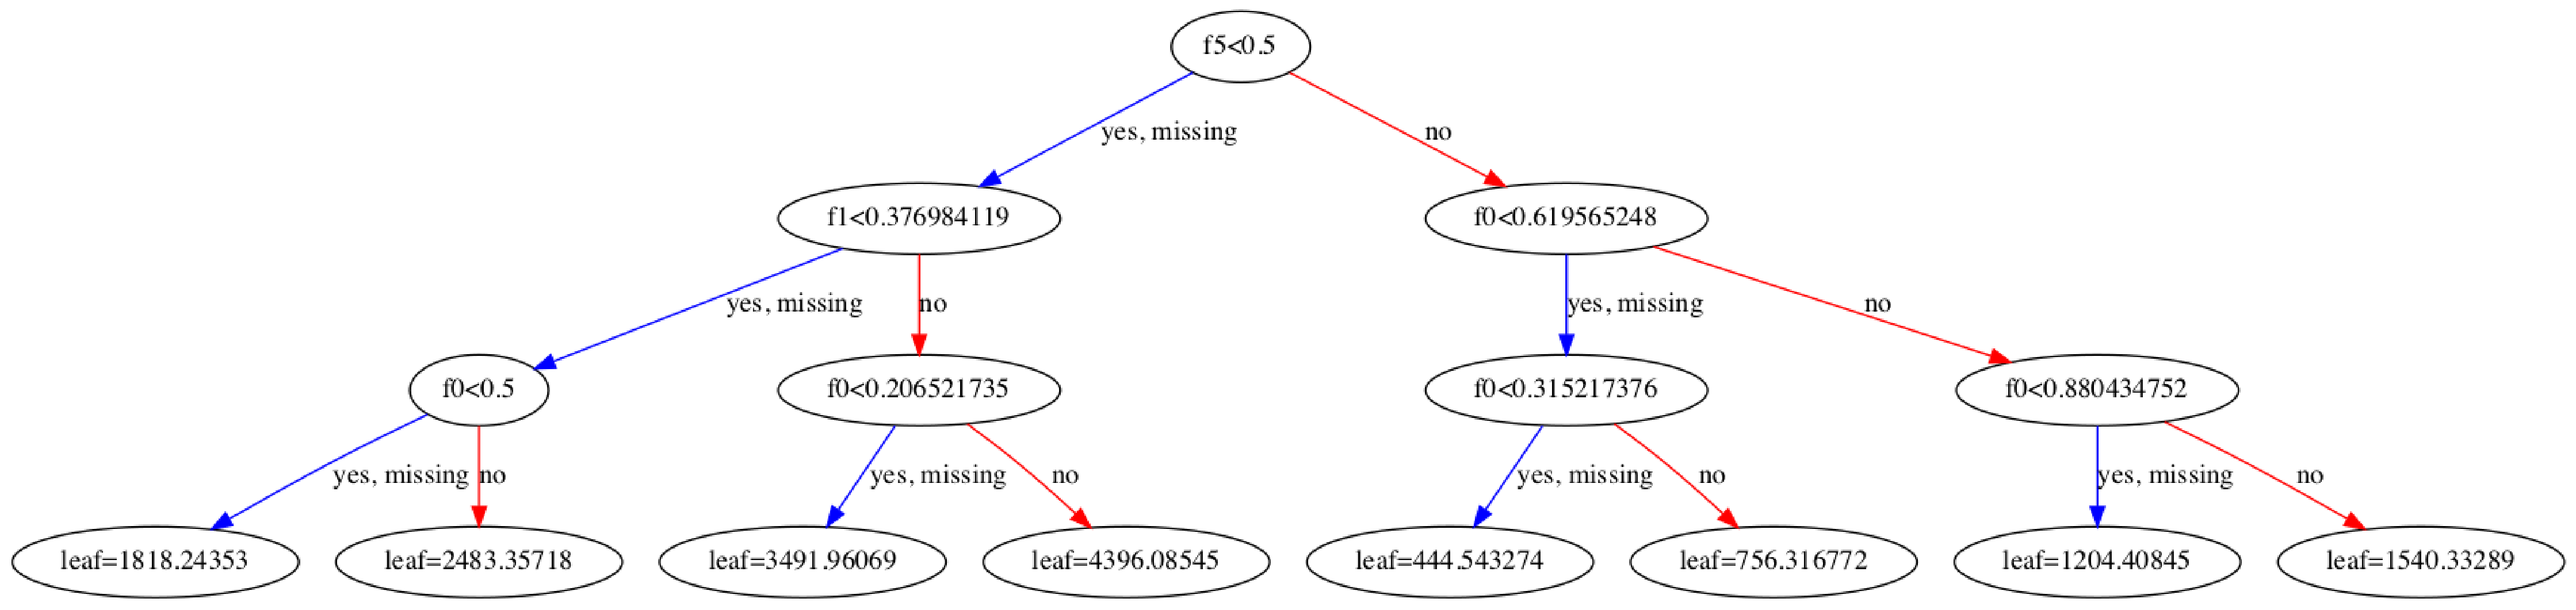

In [19]:
xgb.plot_tree(xgb_reg)

In [20]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [21]:
r2_score(y_test, y_pred)

0.8603235596488238

##### GreadSearch

In [33]:
params = {'max_depth': range(3, 4, 5),
    'n_estimators': range(80, 90, 100),
    'booster': ('gbtree', 'gblinear', 'dart'),
    'objective': ('reg:linear', 'reg:squarederror')
         }

In [34]:
xgb_reg_gs = GridSearchCV(xgb_reg, params, cv = 5)
xgb_reg_gs.fit(norm_X_train,y_train)
best_params = xgb_reg_gs.best_params_
print(best_params)

[13:15:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:15:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [35]:
xgb_best_model = \
    xgb.XGBRegressor(max_depth= best_params['max_depth'], 
                            n_estimators = best_params['n_estimators'],
                            booster = best_params['booster']
                     )

In [37]:
xgb_best_model.fit(norm_X_train, y_train)
xgb_best_model_score = xgb_best_model.score(norm_X_test, y_test)
print('Best Score: ', xgb_best_model_score)

[13:16:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Score:  0.8611939460753555
